In [5]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

from src.parsers import NewsgroupsParser, ReutersParser
from src.engines.doc2vec import Doc2VecModel

In [6]:
NEWSGROUPS = NewsgroupsParser()

In [7]:
model = Doc2VecModel(dataset=NEWSGROUPS, use_predictor=False)

In [8]:
labels = []

for entry in model.dataset.entries:
    for label in entry.labels:
        if label not in labels:
            labels.append(label)

# get train and test sets
X = np.array([vector for vector in map(
    lambda e: model.model.dv[e.id],
    model.dataset.entries)])
y = np.array([
    y_labs for y_labs in map(
    lambda e: np.array(np.array(
        [int(label in e.labels) for label in labels])),
    model.dataset.entries)]
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [9]:
parameters = {
    "estimator__C": [1, 4],
    "estimator__kernel": ["poly"],
    "estimator__degree":[2, 3, 4],
}

model = OneVsRestClassifier(SVC())

clf = GridSearchCV(model, param_grid=parameters, scoring='f1_micro')

In [10]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid={'estimator__C': [1, 4], 'estimator__degree': [2, 3, 4],
                         'estimator__kernel': ['poly']},
             scoring='f1_micro')

In [11]:
print(clf.best_params_)
print(clf.best_score_)

{'estimator__C': 4, 'estimator__degree': 3, 'estimator__kernel': 'poly'}
0.6973894202460953


In [16]:
clf = OneVsRestClassifier(SVC(C=4, degree=3, kernel='poly'))
# clf.fit(X_train, y_train)

In [13]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.45      0.56       203
           1       0.82      0.52      0.64       207
           2       0.84      0.77      0.80       165
           3       0.75      0.53      0.62       157
           4       0.88      0.71      0.79       182
           5       0.97      0.87      0.92       195
           6       0.91      0.80      0.85       176
           7       0.90      0.71      0.79       182
           8       0.78      0.53      0.64       191
           9       0.87      0.70      0.78       209
          10       0.74      0.39      0.52       147
          11       0.76      0.57      0.65       202
          12       0.86      0.57      0.68       173
          13       0.87      0.64      0.74       193
          14       0.82      0.55      0.66       193
          15       0.74      0.48      0.58       176
          16       0.83      0.65      0.73       192
          17       0.79    

In [15]:
score['test_score'].mean()

0.08987445157921188

In [20]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import matplotlib.pyplot as plt

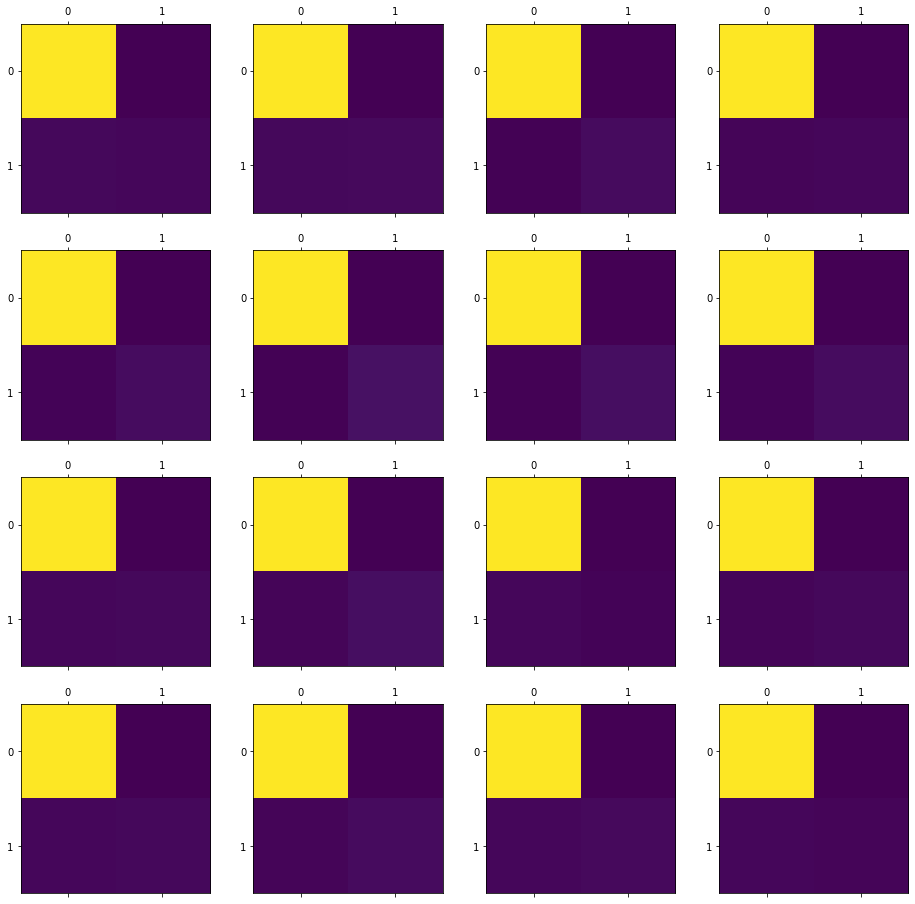

In [21]:
matrix = multilabel_confusion_matrix(y_test, y_pred)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

n = len(axs)
m = len(axs[0])
for i in range(n):
    for j in range(m):
        axs[i, j].matshow(matrix[i * n + j])

In [22]:
fig.savefig('./image2.png')